In [1]:
import rosbag
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tf

In [2]:
bag = rosbag.Bag('/home/uware/rosbags/d_l_all_2022-03-01-10-35-52.bag')

# create variables
target = 'is_detected'

# in meters per second ( walking speed is about 1.4m/s )
# velocity = 1.4

In [3]:
topic = '/tag_detections'

rows = []

for topic, msg, t in bag.read_messages(topics=topic):
    time = t

    # we only care if there is or there isn't a detection, =0 or >0, and take the first detection for the moment
    is_detected = len(msg.detections)

    # detection distances only for information, it is not being used for anything
    detection_distance = msg.detections[0].pose.pose.pose.position.z if is_detected>0 else None

    # create row
    row={'time': time.to_sec(), target: is_detected, 'detection_distance': detection_distance}
    rows.append(row)

df = pd.DataFrame.from_records(rows)

In [4]:
# calculate relative time in seconds instead of absolute time
df['relative_time'] =  df.loc[0:, 'time'] - df.at[0, 'time']
df = df.drop(columns=['time'])
df.groupby(target).head(3)

,is_detected,detection_distance,relative_time
0,0,NaN,0.000000
1,0,NaN,0.321184
2,0,NaN,0.573977
35,1,1.150682,7.187892
36,1,1.142857,7.382724
55,1,1.109309,11.117009


In [6]:
# ratio of detected to not
df.is_detected.value_counts(normalize=True)*100

0    51.800379
1    48.199621
Name: is_detected, dtype: float64

<AxesSubplot:xlabel='relative_time', ylabel='is_detected'>

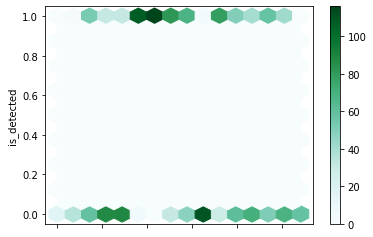

In [5]:
df.reset_index().plot.hexbin(x="relative_time", y=target, gridsize=15)